<a href="https://colab.research.google.com/github/larialbu/curso_machine_learning_senac/blob/main/aula_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLASSIFICADORES

In [1]:
#importando módulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Download do Dataset: https://docs.google.com/spreadsheets/d/1fL7bxCR0WSXLzM37h-yIE3_V_8IoI_i9Y_BaRg6CbKc/edit#gid=1961821521

caminho: /content/pima-data.csv.xlsx

In [3]:
#Carregando o dataset
df = pd.read_csv("/content/pima-data.csv")

In [4]:
#verificando formato dos dados
df.shape
     

(768, 10)

In [5]:
#verificando as primeiras linhas do dataset
df.head(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
#verificando as 5 ultimas linhas
df.tail(5)
     

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [7]:
#verificando se existem valores nulos
df.isnull().values.any()

False

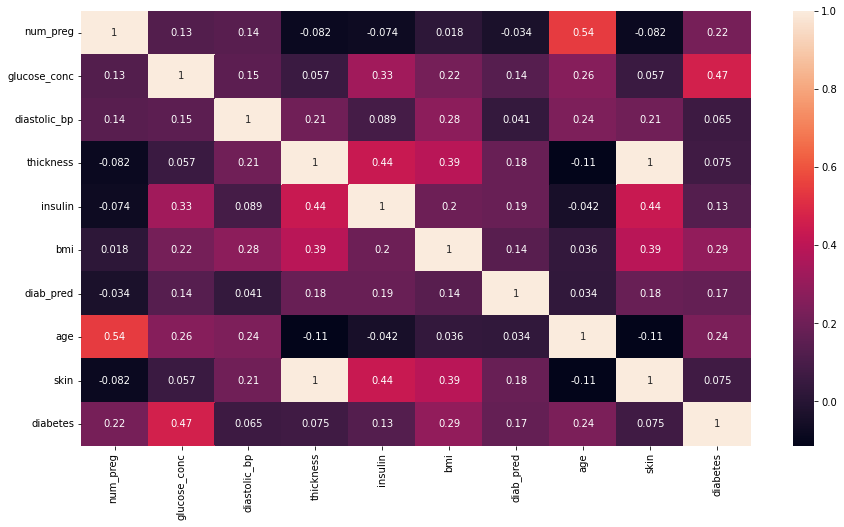

In [8]:
#criando  o gráfico
correlacao = df.corr()
ax = sns.heatmap(correlacao, annot = True) #annot significa anotação para aparecer os números
sns.color_palette("pastel")
ax.figure.set_size_inches(15, 8)
     

#Visualizando a correlação em tabela:

Coeficiente de correlação:

+1 = forte correlação positiva

0 = não há correlação

-1 = forte correlação negativa

In [9]:

df.corr() #mostra a correlação da tabela!

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


.map(): mapeia colunas e substitui valores de uma coluna por outro valor associado a um dicionário, série, ou função.

In [10]:

#Definindo as classes
diabetes_map = {True : 1, False : 0}

In [11]:

#Aplicando o mapeamento do dataset ()
df['diabetes'] = df['diabetes'].map(diabetes_map)

Verificando se os dados estão distribuidos

In [12]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de casos Falsos: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de casos Verdadeiros: 268 (34.90%)
Número de casos Falsos: 500 (65.10%)


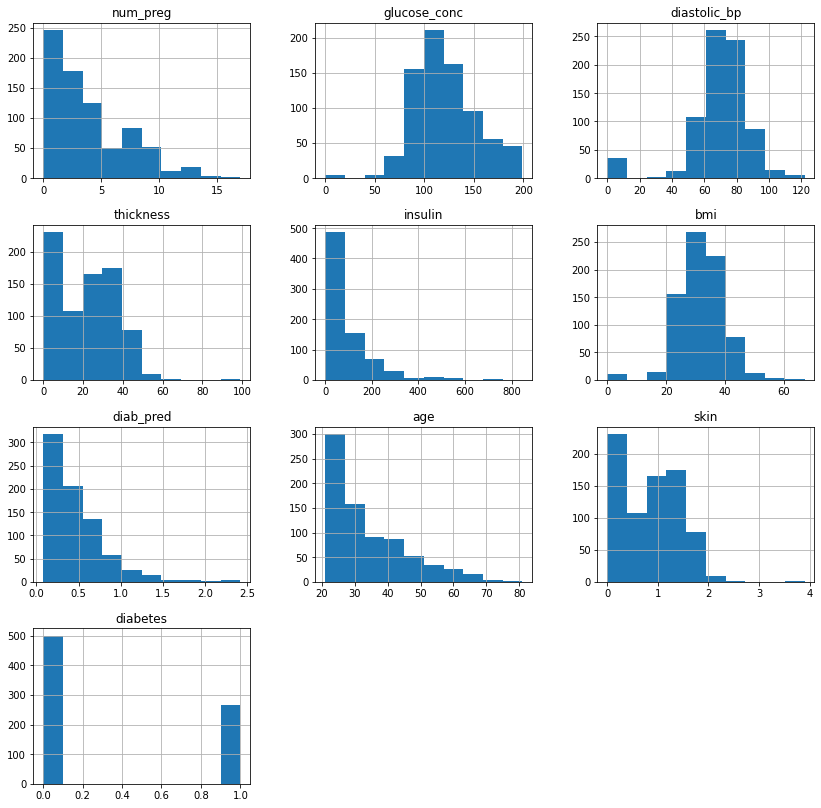

In [13]:

df.hist(figsize=(14,14))
plt.show()

#Spliting

80% para dados de treino e 20% para dados de teste

In [14]:
df.shape
     

(768, 10)

In [15]:
import sklearn as sk

In [16]:
from sklearn.model_selection import train_test_split
     

In [17]:

#Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [18]:
#váriavel a ser prevista
atrib_prev = ['diabetes']
     

In [19]:
#Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [20]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [21]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [22]:
#Definindo a taxa de split (Taxa de participação do conjunto de teste)
split_test_size = 0.20

In [23]:


#Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, shuffle=True, random_state = 24)

In [24]:
perc_treino = (len(X_treino)/len(df.index)) * 100
perc_treino = round(perc_treino, 2)
print(perc_treino, "%", "para os dados de treino.")

perc_teste = (len(X_teste)/len(df.index)) * 100
perc_teste = round(perc_teste, 2)
print(perc_teste, "%", "para os dados de teste.")
     

79.95 % para os dados de treino.
20.05 % para os dados de teste.


#Valores Missing Ocultos

In [25]:
#verificando se existem valores nulos
df.isnull().values.any()

False

In [26]:
df.head(10)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1


In [27]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


#Tratando Dados Missing - Impute

Tratando Dados Missing - Impute

In [28]:
#Transformador de imputação para completar os valores ausentes.
from sklearn.impute import SimpleImputer

In [29]:

#criando objeto
imput_media = SimpleImputer(missing_values= 0, strategy= "mean")

#Substituindo os valores iguais a zero, pela média dos dados
X_treino = imput_media.fit_transform(X_treino)
X_teste = imput_media.fit_transform(X_teste)

In [30]:

#Utilizando um classificador Naive Bayes

from sklearn.naive_bayes import GaussianNB

In [31]:
#Criando o modelo preditivo
modelo1 = GaussianNB()
     

In [32]:
#Treinando o modelo
modelo1.fit(X_treino, Y_treino.ravel()) #  .ravel() é para trabalhar com multdimensão do numpy

GaussianNB()

#Verificando a exatidão no modelo nos dados de teste

In [33]:

from sklearn import metrics

In [34]:

nb_predict_test = modelo1.predict(X_teste)

In [35]:

nb_acc_test = metrics.accuracy_score(Y_teste, nb_predict_test)

In [36]:

nb_acc_test = (round(nb_acc_test, 2)) * 100

In [37]:

print("Exatidão (Accuracy):", nb_acc_test,"%")

Exatidão (Accuracy): 73.0 %


#Métricas

In [38]:
print(metrics.classification_report(Y_teste, nb_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        98
           1       0.68      0.50      0.58        56

    accuracy                           0.73       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



#Otimizando o Modelo com RandomForest

In [39]:

from sklearn.ensemble import RandomForestClassifier

In [40]:
modelo2 = RandomForestClassifier(random_state = 24)
modelo2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=24)

In [41]:

#Verificando os dados de treino
rf_predict_train = modelo2.predict(X_treino)
ac_treino = metrics.accuracy_score(Y_treino, rf_predict_train)
print("Exatidão (Accuracy): %.4f" %(ac_treino))

Exatidão (Accuracy): 1.0000


In [42]:
#verificamdo nos dados de teste
rf_predict_test = modelo2.predict(X_teste)
rf_ac_test = metrics.accuracy_score(Y_teste, rf_predict_test)
print("Exatidão (Accuracy): %.4f" %rf_ac_test)

Exatidão (Accuracy): 0.7273


In [43]:

print(metrics.classification_report(Y_teste, rf_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        98
           1       0.65      0.54      0.59        56

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



#Regressão Logistica

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
#Terceira versão do modello usando Regressão Logpistica
modelo3 = LogisticRegression(C = 0.5, random_state = 42, max_iter = 100)
modelo3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo3.predict(X_teste)

In [46]:

ac_teste_rl = metrics.accuracy_score(Y_teste, lr_predict_test)
print("Exatidão (Accuracy): %.4f" % ac_teste_rl)

Exatidão (Accuracy): 0.7143


In [47]:

#Resumindo
print("Exatidão nos dados de teste!\n")

print("Modelo usando algoritmo Naive Bayes:", nb_acc_test, "%")
print("Modelo usando algoritmo Random Forest:",(round(rf_ac_test, 2))*100, "%")#o dois é a quantidade de casas do arredondamento
print("Modelo usando algoritmo Regressão Logística:",(round(ac_teste_rl, 2))*100, "%")

Exatidão nos dados de teste!

Modelo usando algoritmo Naive Bayes: 73.0 %
Modelo usando algoritmo Random Forest: 73.0 %
Modelo usando algoritmo Regressão Logística: 71.0 %
